# EDA PProductions

Análise exploratória dos dados fornecidos pela PProductions

O objetivo desta análise é fornecer insights relacionados a produção e lançamentos de filmes que possam orientar o estúdio nas decisões para projetos futuros.

### Limpeza dos dados

In [13]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [14]:
# Lendo os dados

df = pd.read_csv('https://raw.githubusercontent.com/pat-weber/lighthouse_project/main/data/raw/desafio_indicium_imdb.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [15]:
# Visualizando o data frame

df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [16]:
# Padronizando as colunas para todas em letra minúscula

df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unnamed: 0     999 non-null    int64  
 1   series_title   999 non-null    object 
 2   released_year  999 non-null    object 
 3   certificate    898 non-null    object 
 4   runtime        999 non-null    object 
 5   genre          999 non-null    object 
 6   imdb_rating    999 non-null    float64
 7   overview       999 non-null    object 
 8   meta_score     842 non-null    float64
 9   director       999 non-null    object 
 10  star1          999 non-null    object 
 11  star2          999 non-null    object 
 12  star3          999 non-null    object 
 13  star4          999 non-null    object 
 14  no_of_votes    999 non-null    int64  
 15  gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [17]:
# Um dado ausente no ano de lançamento sendo transformado em 0 para seguir com as análises

df['released_year'] = df['released_year'].replace('PG', 0)

# Transformando os dados dos anos em numéricos

df['released_year'] = df['released_year'].astype(int)
df['runtime'] = df['runtime'].str.replace('min', '').astype(int)
df['gross'] = df['gross'].str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unnamed: 0     999 non-null    int64  
 1   series_title   999 non-null    object 
 2   released_year  999 non-null    int64  
 3   certificate    898 non-null    object 
 4   runtime        999 non-null    int64  
 5   genre          999 non-null    object 
 6   imdb_rating    999 non-null    float64
 7   overview       999 non-null    object 
 8   meta_score     842 non-null    float64
 9   director       999 non-null    object 
 10  star1          999 non-null    object 
 11  star2          999 non-null    object 
 12  star3          999 non-null    object 
 13  star4          999 non-null    object 
 14  no_of_votes    999 non-null    int64  
 15  gross          830 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.0+ KB


In [18]:
# Visualizando os valores médios e a mediana da coluna de faturamento

print('Média de Faturamento', df['gross'].mean())
print('Valor mediano de Faturamento', df['gross'].median())

Média de Faturamento 68082574.10481928
Valor mediano de Faturamento 23457439.5


Os valores ausentes de faturamento impactarão nas análises e modelagens que serão feitas, uma vez que um filme ter 0 como faturamento não é factível. Esses valores ausentes serão preenchidos com o valor mediano, que é o valor encontrado no meio da abrangência dos dados, assim os valores dos filmes que atingiram picos de bilheteria muito acima da maioria dos dados não influenciarão tanto na definição dos valores ausentes.

A mesma abordagem se dará para os valores ausentes nas avaliações da coluna meta_score.

In [19]:
# Preenchendo valores ausentes com o valor mediano nas colunas de faturamento e avaliações

df['gross'] = df['gross'].fillna(df['gross'].median())
df['meta_score'] = df['meta_score'].fillna(df['meta_score'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unnamed: 0     999 non-null    int64  
 1   series_title   999 non-null    object 
 2   released_year  999 non-null    int64  
 3   certificate    898 non-null    object 
 4   runtime        999 non-null    int64  
 5   genre          999 non-null    object 
 6   imdb_rating    999 non-null    float64
 7   overview       999 non-null    object 
 8   meta_score     999 non-null    float64
 9   director       999 non-null    object 
 10  star1          999 non-null    object 
 11  star2          999 non-null    object 
 12  star3          999 non-null    object 
 13  star4          999 non-null    object 
 14  no_of_votes    999 non-null    int64  
 15  gross          999 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.0+ KB


### Análise dos dados

Em um primeiro olhar para os dados vamos visualizar a distribuição dos filmes por ano de lançamento e situar as faixas de faturamento para definir o que é considerado média ou alta receita.

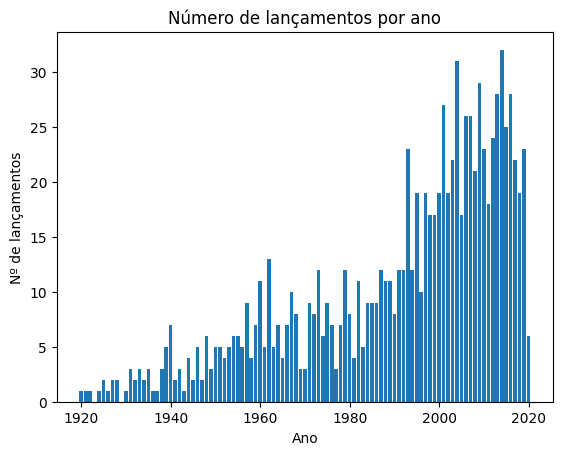

In [20]:
# Visualizando lançamentos de filmes por ano
# Existe um título com esse valor ausente, como não excluímos ele da base de dados, vamos tirá-lo apenas deste gráfico

df = df[df['released_year'] != 0]

# Agrupando por ano e contando o número de filmes
grouped_df = df.groupby('released_year')['series_title'].count()

plt.bar(grouped_df.index, grouped_df.values)
plt.xlabel('Ano')
plt.ylabel('Nº de lançamentos')
plt.title('Número de lançamentos por ano')
plt.show()


O gráfico mostra um aumento signficativo de lançamento a partir do final dos anos 90. Essa foi a época em que as tecnologias de captação e edição digitais tomaram espaço na indústria, surgem mais filmes de animação e com efeitos especiais. 
Para exemplo desta afirmação, vamos ver este mesmo gráfico com somente os filmes do gênero animação. 

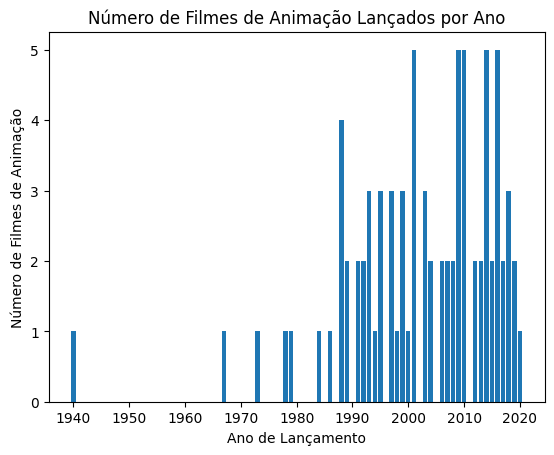

In [21]:
# Filtrando os filmes que contêm "Animation" no gênero
df_animation = df[df['genre'].str.contains('Animation', case=False, na=False)]

# Removendo filmes com ano de lançamento 0
df_animation = df_animation[df_animation['released_year'] != 0]

# Agrupando por ano e contando o número de filmes
grouped_df = df_animation.groupby('released_year')['series_title'].count()

plt.bar(grouped_df.index, grouped_df.values)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes de Animação')
plt.title('Número de Filmes de Animação Lançados por Ano')
plt.show()

A maior parte dos filmes de animação foram lançados do final dos anos 80 em diante.

Agora vamos analisar números de faturamento dos filmes.

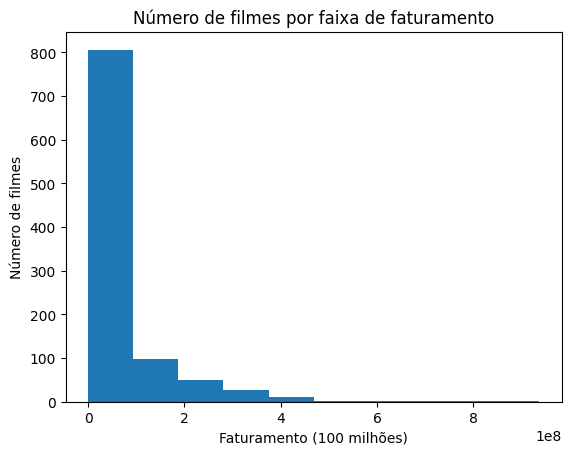

In [22]:
# Visualizando um histograma de faixas de faturamento

plt.hist(df['gross'], bins=10)
plt.xlabel('Faturamento (100 milhões)')
plt.ylabel('Número de filmes')
plt.title('Número de filmes por faixa de faturamento')
plt.show()


A maior parte dos filmes não passa de 150 milhões de faturamento. Alguns títulos alcançaram 600 milhões ou mais, vamos olhar para eles.

In [23]:
# Selecionando os filmes que faturaram mais que 600 milhões

df_top_gross = df[df['gross'] > 600000000]
df_top_gross = df_top_gross.sort_values(by='gross', ascending=False)

# Imprimindo o número de linhas e colunas do DataFrame filtrado
print(df_top_gross.shape)

# Selecionando informações sobre os filmes com maior faturamento
df_top_gross = df_top_gross[['series_title', 'released_year', 'director', 'gross', 'genre']]

df_top_gross

(7, 16)


,series_title,released_year,director,gross,genre
476,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,936662225.0,"Action, Adventure, Sci-Fi"
58,Avengers: Endgame,2019,Anthony Russo,858373000.0,"Action, Adventure, Drama"
622,Avatar,2009,James Cameron,760507625.0,"Action, Adventure, Fantasy"
59,Avengers: Infinity War,2018,Anthony Russo,678815482.0,"Action, Adventure, Sci-Fi"
651,Titanic,1997,James Cameron,659325379.0,"Drama, Romance"
356,The Avengers,2012,Joss Whedon,623279547.0,"Action, Adventure, Sci-Fi"
890,Incredibles 2,2018,Brad Bird,608581744.0,"Animation, Action, Adventure"


7 filmes passaram da marca de 600 milhões, 3 deles da série Avengers que assim como Star Wars, Avatar e Os Incríveis 2, entram no gênero de ação e aventura. O único título que fica fora desta categoria é Titanic. Também é o único filme lançado antes da década de 2000.

Destes 7 filmes, 4 deles são continuações de sequênci: Star Wars: Episode VII, Avengers Endgame e Infinity War e Incredibles 2.s.

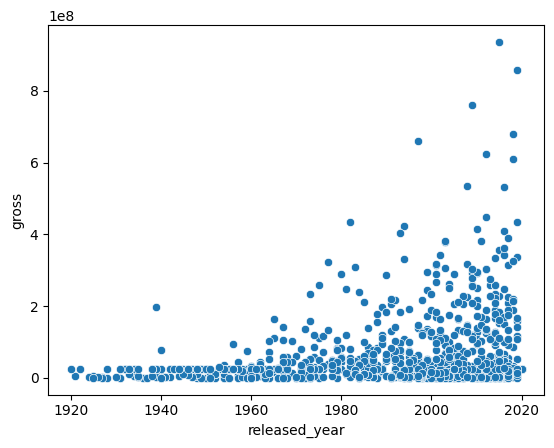

In [24]:
# Visualizando a correlação entre ano de lançamento e faturamento

sns.scatterplot(x='released_year', y='gross', data=df)
plt.show()

Existe uma baixa correlação entre ano de lançamento e faturamento, mais especificamente a partir dos anos 60 e para filmes que superam margens de faturamento. 

Podemos dizer que a partir dos anos 60, cada destaque de bilheteria foi cada vez mais expressivo, o que é explicado pela popularização das salas de cinema, criação de shoppings centers com mais salas, o que reflete diretamente em um público maior e por consequência, maior faturamento. 

Porém, um filme faturar 200 milhões em 1940, não é a mesma coisa que 200 milhões nos anos 2000. Este título de 1940 claramente se destacou mais do que tantos filmes que obtiveram essa marca nos últimos anos.

Vamos olhar para os outliers por década. 

In [25]:
# Ordenando por faturamento

df_gross = df.sort_values(by='gross', ascending=False)

# Criando a coluna de década
df_gross['decade'] = (df_gross['released_year'] // 10) * 10

# Selecionando os 3 filmes com maior faturamento por década
df_top_3_gross = df_gross.groupby('decade').apply(lambda x: x.nlargest(3, 'gross'), include_groups=False).reset_index(drop=True)

# Selecionando as colunas desejadas
df_top_3_gross = df_top_3_gross[['series_title', 'director', 'released_year', 'genre']]

# Exibindo os resultados
df_top_3_gross

,series_title,director,released_year,genre
0,Das Cabinet des Dr. Caligari,Robert Wiene,1920,"Fantasy, Horror, Mystery"
1,The Circus,Charles Chaplin,1928,"Comedy, Romance"
2,Nosferatu,F.W. Murnau,1922,"Fantasy, Horror"
3,Gone with the Wind,Victor Fleming,1939,"Drama, History, Romance"
4,The Invisible Man,James Whale,1933,"Horror, Sci-Fi"
5,The 39 Steps,Alfred Hitchcock,1935,"Crime, Mystery, Thriller"
6,Fantasia,James Algar,1940,"Animation, Family, Fantasy"
7,The Best Years of Our Lives,William Wyler,1946,"Drama, Romance, War"
8,Lifeboat,Alfred Hitchcock,1944,"Drama, War"
9,The Ten Commandments,Cecil B. DeMille,1956,"Adventure, Drama"


Como o gráfico não especifica qual foi o outlier próximo dos anos 40, vamos olhar para ele criando um filtro para o único título que faturou mais de 100 milhões antes dos anos 50.

In [26]:
# Selecionando o filme que faturou mais de 150 milhões e foi lançado antes de 1960

outlier = df[(df['gross'] > 150_000_000) & (df['released_year'] < 1960)]
outlier

,unnamed: 0,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
313,314,Gone with the Wind,1939,U,238,"Drama, History, Romance",8.1,A manipulative woman and a roguish man conduct...,97.0,Victor Fleming,George Cukor,Sam Wood,Clark Gable,Vivien Leigh,290074,198676459.0


"E o Vento Levou" é o filme de maior faturamento da primeira metáde do século XXI. 

É um destaque realmente expressivo, porém único. Vamos analisar os gêneros que mais se destacam ao longo do período.

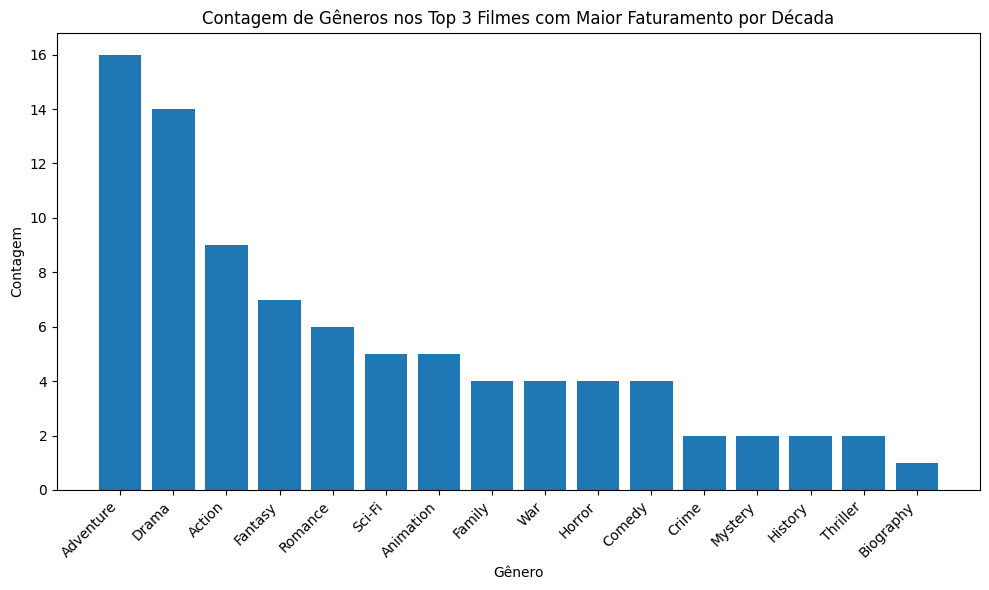

In [27]:
# Dividindo a coluna de gêneros em listas
df_top_3_gross['genre_list'] = df_top_3_gross['genre'].str.split(', ')

# Criando uma série com todas as listas de gêneros
genre_series = df_top_3_gross['genre_list'].explode()

# Criando dummies para cada gênero
genre_dummies = pd.get_dummies(genre_series).groupby(level=0).sum()

# Somando as colunas para obter a contagem de cada gênero
genre_counts = genre_dummies.sum()

# Convertendo o resultado para um DataFrame para melhor visualização
top_3_genre_counts_df = genre_counts.sort_values(ascending= False).reset_index()
top_3_genre_counts_df.columns = ['Genre', 'Count']

plt.figure(figsize=(10, 6))
plt.bar(top_3_genre_counts_df['Genre'], top_3_genre_counts_df['Count'])
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de Gêneros nos Top 3 Filmes com Maior Faturamento por Década')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Estes são os gêneros que mais aparecem entre os filmes de maior faturamento de cada década. Aventura e drama se destacam. Importante ressaltar que um filme pode ser classificado em mais de gênero, um biografia pode ser classificada também como drama, por exemplo. Então esta contagem no gráfico acima representa o número de ocorrências em que um filme foi classificado em um gênero, sendo que esse filme também poderá ser contabilizado em outros gêneros. 

Agora vamos fazer um recorte de datas mais próximas da atualidade com objetivo de promover insights para o mercado contemporâneo de produções. 

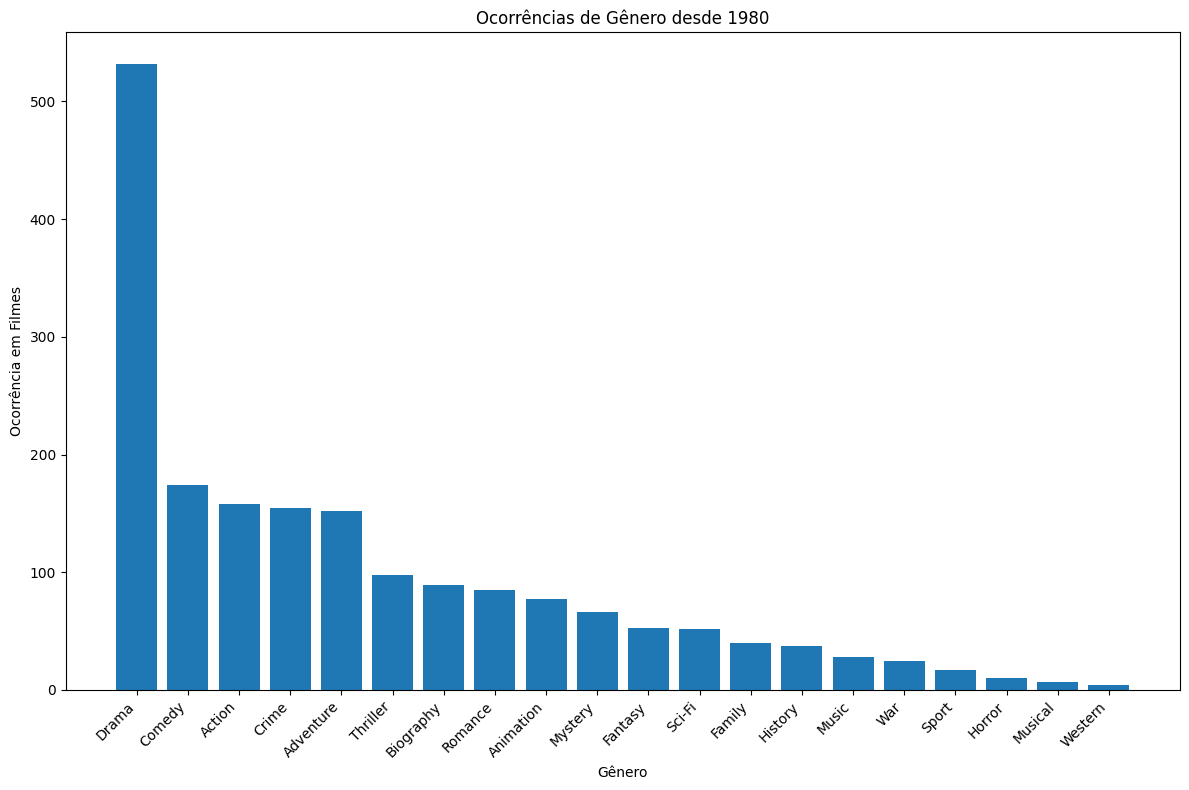

In [28]:
# Filtrando filmes lançados a partir de 1980
df_80_filtered = df[df['released_year'] >= 1980].copy()

# Dividindo a coluna de gêneros em listas
df_80_filtered.loc[:, 'genre_list'] = df_80_filtered['genre'].str.split(', ')

# Destrinchando a coluna de listas de gêneros para que cada filme apareça várias vezes, uma para cada gênero
df_exploded = df_80_filtered.explode('genre_list')

# Ordenando e contando as ocorrências de gênero
genre_counts = df_exploded['genre_list'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Ordenando os gêneros pelo número de filmes em ordem decrescente
genre_counts = genre_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.bar(genre_counts['genre'], genre_counts['count'])
plt.xlabel('Gênero')
plt.ylabel('Ocorrência em Filmes')
plt.title('Ocorrências de Gênero desde 1980')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A mesma metodologia de contagem aplicada com os filmes lançados de 1980 em diante.

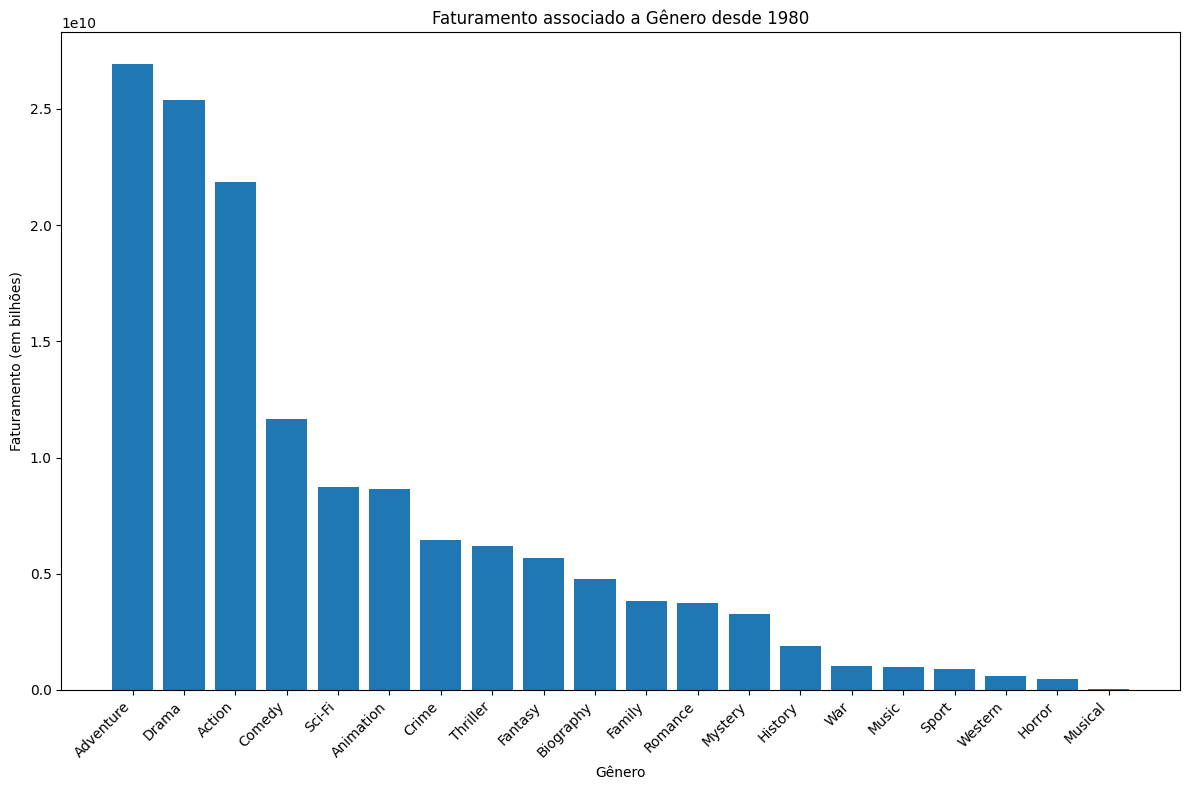

In [29]:
# Agrupando pelo gênero e somar o faturamento
genre_gross = df_exploded.groupby('genre_list')['gross'].sum().reset_index()

# Ordenando os gêneros pelo faturamento em ordem decrescente
genre_gross = genre_gross.sort_values(by='gross', ascending=False).reset_index(drop=True)

# Convertendo o número de faturamento para melhor visualização
pd.options.display.float_format = '{:,.2f}'.format

# Plotando o gráfico 

plt.figure(figsize=(12, 8))
plt.bar(genre_gross['genre_list'], genre_gross['gross'])
plt.xlabel('Gênero')
plt.ylabel('Faturamento (em bilhões)')
plt.title('Faturamento associado a Gênero desde 1980')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Enquanto que na ocorrência do gênero de filmes lançados o gênero drama se destaca isolado dos outros, no montate de faturamento o gênero mais expressivo nos últimos anos é aventura, porém não isolado no topo. Aventura, drama e ação estão em um patamar de faturamento próximo, enquanto que comédia e os outros seguem abaixo. 

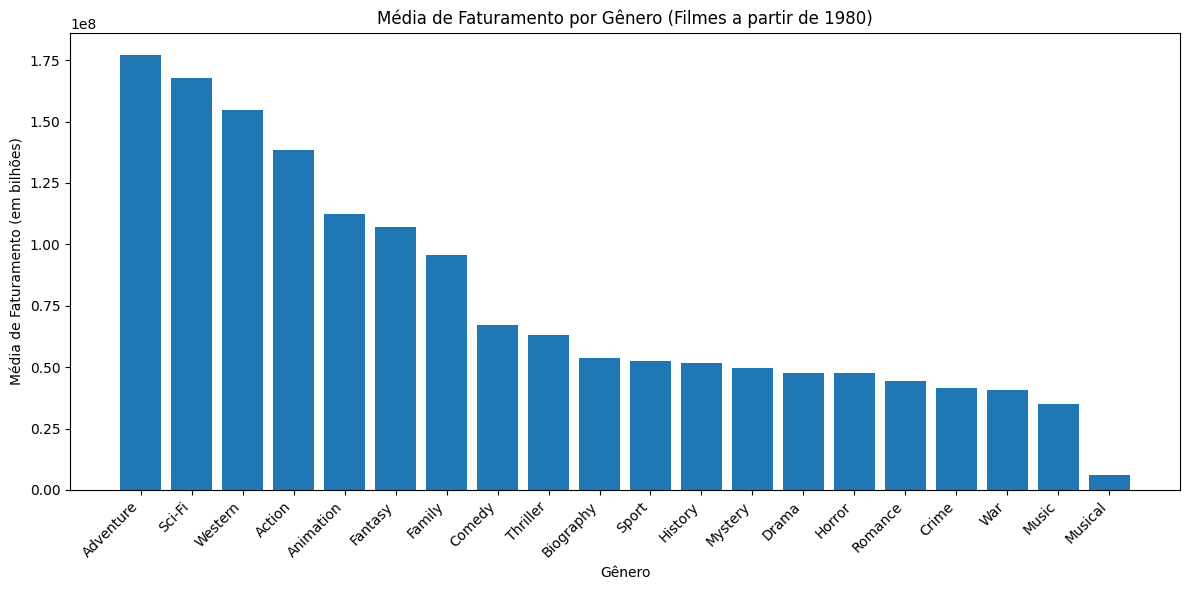

In [30]:
genre_mean_gross = df_exploded.groupby('genre_list')['gross'].mean().reset_index()
genre_mean_gross.columns = ['Genre', 'Mean Gross']

genre_mean_gross = genre_mean_gross.sort_values(by='Mean Gross', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(genre_mean_gross['Genre'], genre_mean_gross['Mean Gross'])
plt.title('Média de Faturamento por Gênero (Filmes a partir de 1980)')
plt.xlabel('Gênero')
plt.ylabel('Média de Faturamento (em bilhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Apesar da ocorrência de filmes de drama se destacar com faturamento alto, a média de faturamento é mais baixa que a maioria dos gêneros.

Vamos confirmar se filmes de aventura faturam mais que filmes de drama testando a hipótese.

In [31]:
# Hipótese 0 é de que as médias de faturamento são iguais

# Filtrando os dados para obter apenas filmes de aventura e drama
df_aventura = df[df['genre'].str.contains('Adventure')]
df_drama = df[df['genre'].str.contains('Drama')]

# Selecionando apenas a coluna de faturamento para cada grupo
faturamento_aventura = df_aventura['gross']
faturamento_drama = df_drama['gross']

# Realizando o teste t de Student para amostras independentes
t_statistic, p_value = stats.ttest_ind(faturamento_aventura, faturamento_drama)

# Nível de significância é 0.05
alpha = 0.05

# Comparando o valor p com o nível de significância
if p_value < alpha:
    print("Rejeitar H0: As médias de faturamento de aventura e drama são diferentes.")
else:
    print("Não há evidências suficientes para rejeitar H0: Não podemos concluir que as médias de faturamento de aventura e drama são diferentes.")


Rejeitar H0: As médias de faturamento de aventura e drama são diferentes.


Confirmado o que o gráfico mostrou: muitos filmes são classificados como drama, mas o gênero com maior faturamento é aventura. 

Também corroborado pela lista dos filmes com faturamento maior que 600 milhões, em que 6 títulos dentre 7 são classificados como ação e aventura. 

In [32]:
df_top_gross

,series_title,released_year,director,gross,genre
476,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,"936,662,225.00","Action, Adventure, Sci-Fi"
58,Avengers: Endgame,2019,Anthony Russo,"858,373,000.00","Action, Adventure, Drama"
622,Avatar,2009,James Cameron,"760,507,625.00","Action, Adventure, Fantasy"
59,Avengers: Infinity War,2018,Anthony Russo,"678,815,482.00","Action, Adventure, Sci-Fi"
651,Titanic,1997,James Cameron,"659,325,379.00","Drama, Romance"
356,The Avengers,2012,Joss Whedon,"623,279,547.00","Action, Adventure, Sci-Fi"
890,Incredibles 2,2018,Brad Bird,"608,581,744.00","Animation, Action, Adventure"


### Conclusão

Aventura é o gênero com maior potencial lucrativo, no entanto, existem outras questões pertinentes para serem consideradas na decisão de escolha de um projeto para investir, como sequências de filmes. Da lista acima, como destacado anteriormente, a maioria dos filmes pertence a uma sequência. 

Pode ser interessante uma análise mais aprofundada no recorte de filmes pertencentes a sequências. 